<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Evaluacion2/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segunda evaluación 

Esquivel Ovilla José Aarón 

### Segunda Evaluación Física Computacional 1 (2021-1)

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 

**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

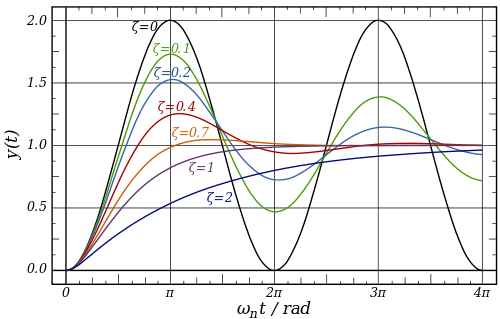

In [73]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power as mpow
from scipy.integrate import odeint, solve_ivp
import math as math

Como $ F_0=0$ tenemos 
\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0 
\end{equation*}
Y separando las ecuaciones y usando 
$$\begin{eqnarray*}
\frac{d x}{d t} = y \\
\frac{d y}{dt} = -2 \zeta \omega_n y-\omega_n^2 x  \\
\end{eqnarray*}$$

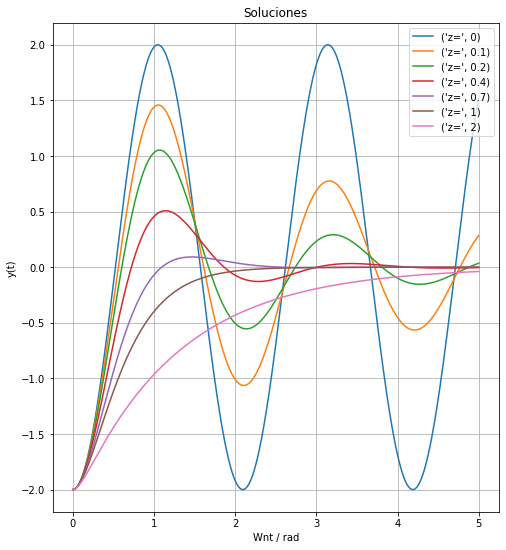

In [74]:
#F0= 0 
#Suponemos que 
m = 1 
k = 9 
#wn = np.sqrt(k/m)
wn = 3
#\zeta = z 
#c = coeficiente de viscocidad 
#z = c / ( 2 * sqrt(m/k))
#Pero como ya nos dan los valores de z entonces 
#z = 0,0.1,0.2,0.4,0.7,1,2
#Definimos a z como una lista
z = [0,0.1,0.2,0.4,0.7,1,2]
#Definimos a nuestra función 
def f(y,t,z,wn):
    x,v= y
    sol = [v,-2*z*wn*v-(wn**2)*x]
    return sol

#Condiciones iniciales 
y0 = [-2,0]
t=np.linspace(0,5,1000)
plt.figure(figsize=(8,9))
for d in z:
  y = odeint(f,y0,t,args=(d,wn))
  plt.plot(t, y[:,0], label=('z=',d))

plt.legend(loc='best')
plt.xlabel('Wnt / rad')
plt.ylabel('y(t)')
plt.title('Soluciones')
plt.grid()
plt.show()

**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

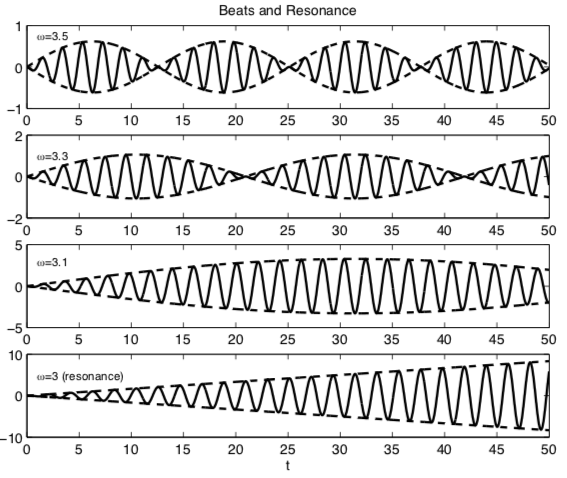

Como tenemos 
$\zeta = 0, F_0 \neq 0$

Nuestra ecuación queda de la siguiente forma

\begin{equation*}
\frac{d^2 x}{d t^2} +\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

Usando 
$$\begin{eqnarray*}
\frac{d x}{d t} = y \\
\frac{d y}{dt} = \frac{1}{m } F_0 \sin(\omega t)-\omega_n^2 x  \\
\end{eqnarray*}$$
Tenemos que$ m=1$ y $F_0 = 1 $o que nos queda al final como 
$$\begin{eqnarray*}
 \\
\frac{d y}{dt} = \sin(\omega t)-\omega_n^2 x  \\
\end{eqnarray*}$$

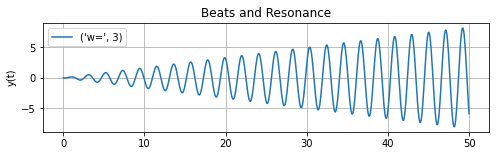

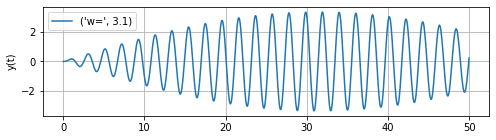

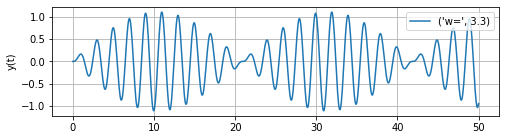

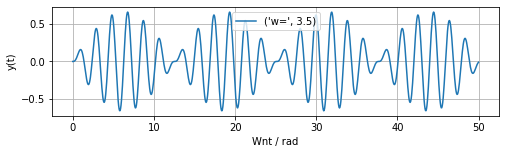

In [75]:
#Se nos dice que supongamos que 
F0 = 1 
m = 1
k = 9
#wn = np.sqrt(k/m)
wn = 3
#Definimos a w como una lista 
w = [3,3.1,3.3,3.5]
#Definimos a nuestra función 
def f(y,t,w):
    x,v = y 
    sol = [v,np.sin(w*t)-wn**2*x]
    return sol
#Condiciones iniciales
y0 = [0,0]
t=np.linspace(0,50,850)
#Hacemos el for para las graficas con los puntos deseados 
for d in w:
  
  plt.figure(figsize=(8,2))
  y = odeint(f,y0,t,args=(d,))
  plt.plot(t, y[:,0], label=('w=',d))
  plt.legend(loc='best')
  if d == 3.5:
    plt.xlabel('Wnt / rad')
  plt.ylabel('y(t)')
  if d == 3 : 
    plt.title('Beats and Resonance')
  plt.grid()
  plt.show()







**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

Usando 
$$\begin{eqnarray*}
\frac{d x}{d t} = y \\
\frac{d y}{dt} = \frac{1}{m } F_0 \sin(\omega t)-2 \zeta \omega_n y-\omega_n^2 x   \\
\end{eqnarray*}$$

Como $F = 1$ y $m = 1$ tenemos entonces
$$\begin{eqnarray*}
\\
\frac{d y}{dt} =  \sin(\omega t)-2 \zeta \omega_n y-\omega_n^2 x   \\
\end{eqnarray*}$$

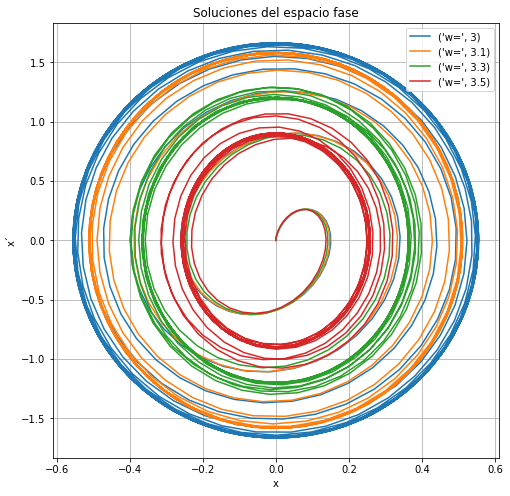

In [76]:
#Se nos dice que 
F0 = 1 
m = 1
k = 9
#wn = np.sqrt(k/m)
wn = 3
#Hacemos la lista de w
w = [3,3.1,3.3,3.5]
#Valor de z
z = 0.1
#Definimos a nuestra función 
def f(y,t,w):
    x,v = y 
    sol = [v,np.sin(w*t)-2*z*wn*v-wn**2*x]
    return sol

#Condiciones iniciales
y0 = [0,0]
t=np.linspace(0,50,850)
#Hacemos la gráfica del espacio fase 
plt.figure(figsize=(8,8))
for d in w:
  y = odeint(f,y0,t,args=(d,))
  plt.plot(y[:,0],y[:,1], label=('w=',d))
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('x´')
plt.title('Soluciones del espacio fase')
plt.grid()
plt.show()
